# SVM for classification

Load IRIS dataset, check its contents:


In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [4]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(150, 4)
(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [5]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
#print(SVMmodel.get_params())
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



Plot scatterplots of targets 0 and 1 and check the separability of the classes:

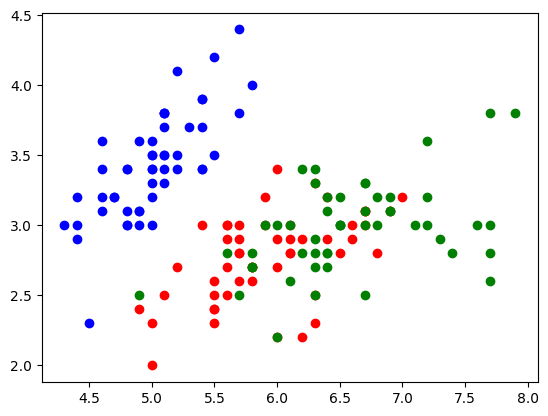

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[y==0,0], X[y==0,1], color = 'blue')
plt.scatter(X[y==1,0], X[y==1,1], color = 'red')
plt.scatter(X[y==2,0], X[y==2,1], color = 'green')

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [7]:
X=iris.data[iris.target != 2]#[2]
y=iris.target[iris.target != 2]
X_train, X_test, y_train, y_test = train_test_split(X[:,:2],y,test_size=0.2)

#print(X)
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
print(SVMmodel.get_params())
SVMmodel.score(X_test,y_test)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


1.0

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

In [ ]:
print(min(X[y==0,0]))

4.3


[[5.5 3.5]
 [5.8 4. ]
 [5.  3. ]
 [4.5 2.3]
 [5.4 3.4]
 [5.4 3.4]
 [4.8 3. ]
 [4.9 3. ]
 [4.9 3.1]
 [5.4 3. ]
 [5.6 2.9]
 [5.6 3. ]
 [5.2 2.7]
 [4.9 2.4]
 [5.9 3.2]
 [5.6 3. ]
 [5.1 2.5]]


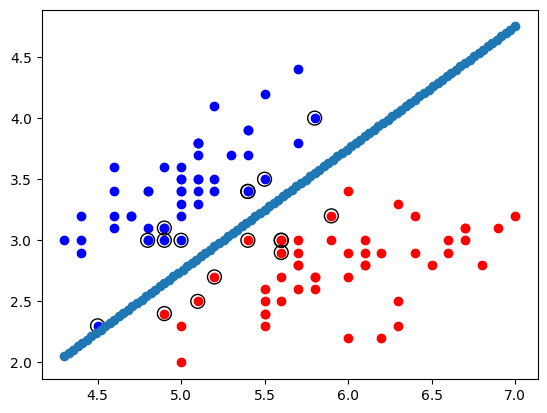

In [13]:
import numpy as np
supvectors=SVMmodel.support_vectors_
#print(supvectors[:,0])
# Plot the support vectors here

plt.scatter(X[y==0,0], X[y==0,1], color = 'blue')
plt.scatter(X[y==1,0], X[y==1,1], color = 'red')

plt.scatter(supvectors[:,0], supvectors[:,1], marker='o', s=100, linewidth=1, facecolors='none', edgecolors='k')
print(supvectors)
#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
x1 = np.linspace(min(min(X[y==0,0]), min(X[y==1,0])),max(max(X[y==0,0]), max(X[y==1,0])),100)
x2 = -b/W[0,1]-W[0,0]/W[0,1]*x1
plt.scatter(x1, x2)

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

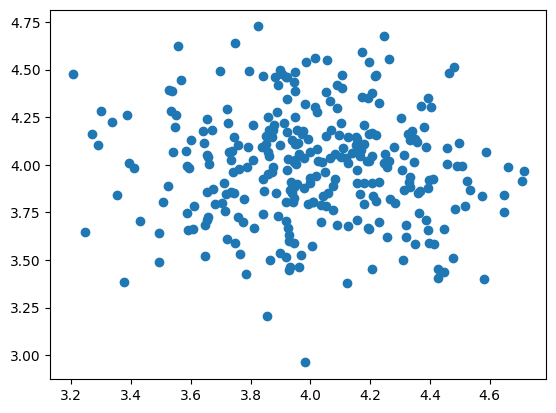

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

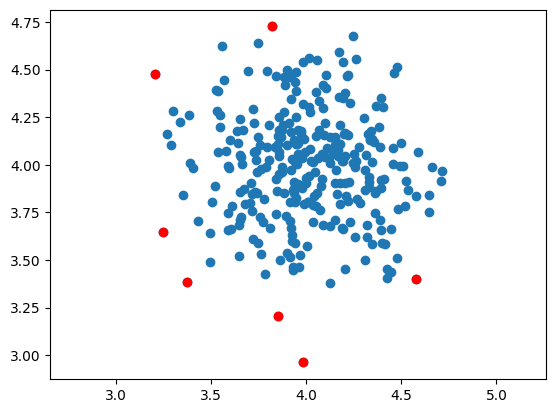

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.991098002015281


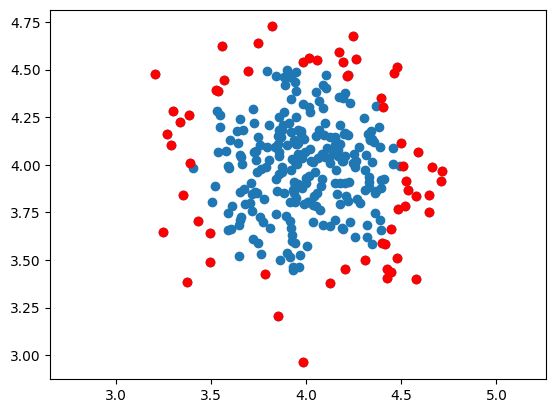

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.2)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()